<a href="https://colab.research.google.com/github/sdikici/Time_Series_Experiments/blob/main/Prophet_Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d albertovidalrod/electricity-consumption-uk-20092022
! unzip electricity-consumption-uk-20092022.zip

 26% 5.00M/19.3M [00:00<00:00, 38.3MB/s]
100% 19.3M/19.3M [00:00<00:00, 99.5MB/s]
Archive:  electricity-consumption-uk-20092022.zip
  inflating: historic_demand_2009_2024.csv  
  inflating: historic_demand_2009_2024_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  
  inflating: historic_demand_year_2024.csv  


In [4]:
!kaggle datasets download -d sercandikici/london-weather-database-from-2009-to-2024
! unzip london-weather-database-from-2009-to-2024.zip

  0% 0.00/301k [00:00<?, ?B/s]
100% 301k/301k [00:00<00:00, 77.2MB/s]
Archive:  london-weather-database-from-2009-to-2024.zip
  inflating: London_2009_to_2024_forecast.csv  


In [5]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_raw = pd.read_csv("historic_demand_2009_2024_noNaN.csv")
df_raw

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264733,2024-02-22 21:30:00,44,21:30:00,31014,32120,28570,2494,6562,0,15905,0,14,1998,991,1053,-444,-48,999,0
264734,2024-02-22 22:00:00,45,22:00:00,29327,30606,27077,2484,6562,0,15905,0,172,1998,991,1053,-450,-57,999,0
264735,2024-02-22 22:30:00,46,22:30:00,28056,29641,25839,2474,6562,0,15905,0,414,1994,991,1053,-450,-121,999,0
264736,2024-02-22 23:00:00,47,23:00:00,26252,28380,24213,2381,6562,0,15905,0,981,1541,992,1053,-451,-96,999,0


In [7]:
df3_year = df_raw[["settlement_date","tsd"]]
df3_year = df3_year[(df3_year["settlement_date"] >= "2009-01-01 00:00:00")&(df3_year["settlement_date"] <= "2011-12-31 23:30:00")]
df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])
df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('6H')
df3_year

,settlement_date,tsd
0,2009-01-01 00:00:00,38704
1,2009-01-01 00:00:00,38964
2,2009-01-01 00:00:00,38651
3,2009-01-01 00:00:00,37775
4,2009-01-01 00:00:00,37298
...,...,...
52261,2011-12-31 18:00:00,31982
52262,2011-12-31 18:00:00,31145
52263,2011-12-31 18:00:00,30803
52264,2011-12-31 18:00:00,30441


In [8]:
six_hourly = df3_year.groupby('settlement_date').agg({'tsd': 'mean'}).reset_index()
six_hourly.set_index("settlement_date", inplace=True)
six_hourly

,tsd
settlement_date,
2009-01-01 00:00:00,36325.916667
2009-01-01 06:00:00,34063.916667
2009-01-01 12:00:00,42932.250000
2009-01-01 18:00:00,40791.500000
2009-01-02 00:00:00,34129.083333
...,...
2011-12-30 18:00:00,38941.833333
2011-12-31 00:00:00,28977.083333
2011-12-31 06:00:00,32329.333333


In [9]:
df = six_hourly.copy()
df["Date"] = df.index
df.columns=["y","ds"]
df

,y,ds
settlement_date,,
2009-01-01 00:00:00,36325.916667,2009-01-01 00:00:00
2009-01-01 06:00:00,34063.916667,2009-01-01 06:00:00
2009-01-01 12:00:00,42932.250000,2009-01-01 12:00:00
2009-01-01 18:00:00,40791.500000,2009-01-01 18:00:00
2009-01-02 00:00:00,34129.083333,2009-01-02 00:00:00
...,...,...
2011-12-30 18:00:00,38941.833333,2011-12-30 18:00:00
2011-12-31 00:00:00,28977.083333,2011-12-31 00:00:00
2011-12-31 06:00:00,32329.333333,2011-12-31 06:00:00


In [10]:
periods = 4*270 #7 days
freq = "6H"

m = Prophet()
m.fit(df)

future_1 = m.make_future_dataframe(periods=periods , freq=freq)
future_1.tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/de91hx_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/4n752r0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=721', 'data', 'file=/tmp/tmpziv0ggw0/de91hx_9.json', 'init=/tmp/tmpziv0ggw0/4n752r0x.json', 'output', 'file=/tmp/tmpziv0ggw0/prophet_modelg5hiypzn/prophet_model-20240315091334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
5431,2012-09-25 18:00:00
5432,2012-09-26 00:00:00
5433,2012-09-26 06:00:00
5434,2012-09-26 12:00:00
5435,2012-09-26 18:00:00


In [11]:
forecast_1 = m.predict(future_1)
forecast_1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5431,2012-09-25 18:00:00,27933.198328,24778.575829,37929.668298,21765.196155,33839.205958,3378.423289,3378.423289,3378.423289,2920.452627,...,1844.086497,1844.086497,1844.086497,-1386.115835,-1386.115835,-1386.115835,0.0,0.0,0.0,31311.621617
5432,2012-09-26 00:00:00,27929.071158,15222.926808,28502.867389,21754.821529,33850.007090,-5927.464111,-5927.464111,-5927.464111,-6389.489544,...,1831.000249,1831.000249,1831.000249,-1368.974817,-1368.974817,-1368.974817,0.0,0.0,0.0,22001.607047
5433,2012-09-26 06:00:00,27924.943987,24632.150376,37767.617729,21744.446904,33860.808221,3571.190168,3571.190168,3571.190168,3040.643184,...,1882.579565,1882.579565,1882.579565,-1352.032580,-1352.032580,-1352.032580,0.0,0.0,0.0,31496.134156
5434,2012-09-26 12:00:00,27920.816817,27879.750071,41271.755966,21734.072278,33871.609352,6850.727471,6850.727471,6850.727471,6237.079524,...,1948.930938,1948.930938,1948.930938,-1335.282991,-1335.282991,-1335.282991,0.0,0.0,0.0,34771.544288
5435,2012-09-26 18:00:00,27916.689646,24586.863625,38036.731952,21723.697652,33881.135912,3581.856309,3581.856309,3581.856309,2920.452627,...,1980.122996,1980.122996,1980.122996,-1318.719313,-1318.719313,-1318.719313,0.0,0.0,0.0,31498.545956


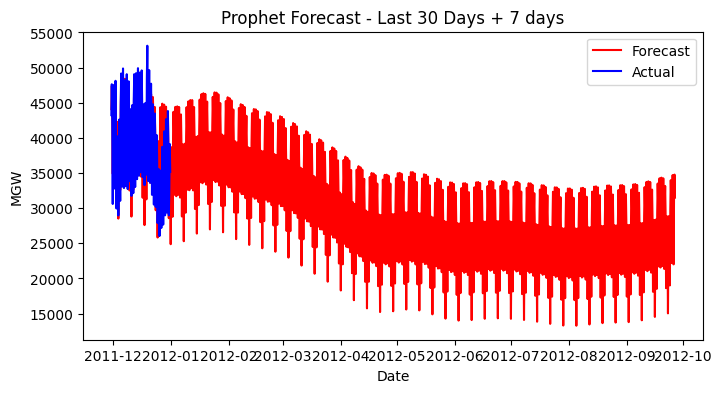

In [12]:
forecast_30_days = forecast_1[forecast_1["ds"] > "2011-11-30"]
actual_30_days = df[df["ds"] > "2011-11-30"]
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(forecast_30_days['ds'], forecast_30_days['yhat'], label='Forecast', color='red')
ax.plot(actual_30_days['ds'], actual_30_days['y'], label='Actual', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('MGW')
plt.title('Prophet Forecast - Last 30 Days + 7 days')
plt.legend()
plt.show()

In [13]:
from prophet.diagnostics import cross_validation

horizon = "270 days" #forecast the next 7 days of data

df_cv = cross_validation(m,
                         horizon=horizon)# numnber of steps to forecast

INFO:prophet:Making 1 forecasts with cutoffs between 2011-04-05 18:00:00 and 2011-04-05 18:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/kkl0ts0a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/wijtcan2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89454', 'data', 'file=/tmp/tmpziv0ggw0/kkl0ts0a.json', 'init=/tmp/tmpziv0ggw0/wijtcan2.json', 'output', 'file=/tmp/tmpziv0ggw0/prophet_modeltp_y5e2a/prophet_model-20240315091339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
from prophet.diagnostics import performance_metrics

pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,27 days 00:00:00,8.812432e+06,2968.574131,2253.371348,0.071207,0.046502,0.067986,0.657407
1,27 days 06:00:00,9.027575e+06,3004.592336,2292.762039,0.072837,0.047516,0.069454,0.648148
2,27 days 12:00:00,9.036300e+06,3006.043991,2297.197601,0.072966,0.047516,0.069576,0.648148
3,27 days 18:00:00,9.054323e+06,3009.040216,2302.155558,0.073099,0.049982,0.069704,0.648148
4,28 days 00:00:00,9.070776e+06,3011.772957,2306.735052,0.073235,0.052196,0.069834,0.648148
...,...,...,...,...,...,...,...,...
968,269 days 00:00:00,5.978073e+07,7731.799808,6980.588141,0.189120,0.158231,0.168059,0.453704
969,269 days 06:00:00,5.988081e+07,7738.269264,6988.963446,0.189408,0.158231,0.168296,0.444444
970,269 days 12:00:00,5.999848e+07,7745.868763,6994.394335,0.189693,0.158231,0.168506,0.444444
971,269 days 18:00:00,6.006304e+07,7750.034983,6999.723918,0.189941,0.160323,0.168721,0.444444


In [15]:
print("mape: "+(str(round(pm["mape"].mean(),10))))

mape: 0.0800161151


model 2 with holidays

In [16]:
m2 = Prophet()
m2.add_country_holidays(country_name="UK")
m2.fit(df)

future_2 = m2.make_future_dataframe(periods=periods , freq=freq)
forecast2 = m2.predict(future_2)
forecast2

DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/a7oqu1__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/dhyy7sn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12851', 'data', 'file=/tmp/tmpziv0ggw0/a7oqu1__.json', 'init=/tmp/tmpziv0ggw0/dhyy7sn4.json', 'output', 'file=/tmp/tmpziv0ggw0/prophet_modelv3aafxtb/prophet_model-20240315091343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01 00:00:00,37723.896645,29572.272487,34658.065607,37723.896645,37723.896645,0.0,0.0,0.0,0.0,...,1877.326710,1877.326710,1877.326710,5069.727253,5069.727253,5069.727253,0.0,0.0,0.0,32147.080032
1,2009-01-01 06:00:00,37721.535007,38911.250527,43903.484148,37721.535007,37721.535007,0.0,0.0,0.0,0.0,...,1812.270117,1812.270117,1812.270117,5057.488336,5057.488336,5057.488336,0.0,0.0,0.0,41497.514783
2,2009-01-01 12:00:00,37719.173369,42348.056531,46978.868794,37719.173369,37719.173369,0.0,0.0,0.0,0.0,...,1726.662489,1726.662489,1726.662489,5046.334779,5046.334779,5046.334779,0.0,0.0,0.0,44594.800890
3,2009-01-01 18:00:00,37716.811731,38677.727786,43541.402229,37716.811731,37716.811731,0.0,0.0,0.0,0.0,...,1628.105546,1628.105546,1628.105546,5036.266219,5036.266219,5036.266219,0.0,0.0,0.0,41167.182188
4,2009-01-02 00:00:00,37714.450093,35302.886206,40308.173429,37714.450093,37714.450093,0.0,0.0,0.0,0.0,...,1478.841807,1478.841807,1478.841807,5027.280855,5027.280855,5027.280855,0.0,0.0,0.0,37876.012380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,2012-09-25 18:00:00,27729.992635,23864.318829,37253.619049,21324.334247,33459.615854,0.0,0.0,0.0,0.0,...,1766.867577,1766.867577,1766.867577,-1523.501808,-1523.501808,-1523.501808,0.0,0.0,0.0,30938.667297
5432,2012-09-26 00:00:00,27725.697885,14272.817271,27644.117947,21309.769625,33461.851365,0.0,0.0,0.0,0.0,...,1735.056555,1735.056555,1735.056555,-1504.919250,-1504.919250,-1504.919250,0.0,0.0,0.0,21611.274815
5433,2012-09-26 06:00:00,27721.403136,24604.961181,37361.272242,21295.205004,33464.086875,0.0,0.0,0.0,0.0,...,1783.596969,1783.596969,1783.596969,-1486.412089,-1486.412089,-1486.412089,0.0,0.0,0.0,31104.119539
5434,2012-09-26 12:00:00,27717.108387,27596.969258,40497.482131,21280.640382,33466.322386,0.0,0.0,0.0,0.0,...,1855.849288,1855.849288,1855.849288,-1467.976422,-1467.976422,-1467.976422,0.0,0.0,0.0,34386.921707


In [17]:
from prophet.diagnostics import cross_validation

df_cv2 = cross_validation(m2,
                         horizon=horizon)# numnber of steps to forecast

pm2 = performance_metrics(df_cv2)

INFO:prophet:Making 1 forecasts with cutoffs between 2011-04-05 18:00:00 and 2011-04-05 18:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/wylu9kcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/76t6tjd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53369', 'data', 'file=/tmp/tmpziv0ggw0/wylu9kcj.json', 'init=/tmp/tmpziv0ggw0/76t6tjd0.json', 'output', 'file=/tmp/tmpziv0ggw0/prophet_model2wf95sze/prophet_model-20240315091347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
print("mape2: "+(str(round(pm2["mape"].mean(),10))))

mape2: 0.0775228739


model 3 holidayu- + weather

In [19]:
df_weather = pd.read_csv("London_2009_to_2024_forecast.csv")
weather3_year = df_weather[["datetime","temp"]]
weather3_year = weather3_year[(weather3_year["datetime"] >= "2009-01-01")&(weather3_year["datetime"] <= "2011-12-31")]
weather3_year["datetime"] = pd.to_datetime(weather3_year["datetime"])
merged_df=pd.merge(df,weather3_year,left_on=df["ds"].dt.date,right_on=weather3_year["datetime"].dt.date,how="inner")
merged_df = merged_df.drop(columns=["key_0",'datetime'])
merged_df

,y,ds,temp
0,36325.916667,2009-01-01 00:00:00,1.2
1,34063.916667,2009-01-01 06:00:00,1.2
2,42932.250000,2009-01-01 12:00:00,1.2
3,40791.500000,2009-01-01 18:00:00,1.2
4,34129.083333,2009-01-02 00:00:00,2.1
...,...,...,...
4351,38941.833333,2011-12-30 18:00:00,6.8
4352,28977.083333,2011-12-31 00:00:00,11.5
4353,32329.333333,2011-12-31 06:00:00,11.5
4354,39123.916667,2011-12-31 12:00:00,11.5


In [20]:
merged_df["ds"] = pd.to_datetime(merged_df["ds"])
merged_df.set_index("ds", inplace=True)
merged_df.insert(1, "ds", df["ds"])
merged_df.sort_index(inplace=True)
df2 = merged_df.copy()
df2

,y,ds,temp
ds,,,
2009-01-01 00:00:00,36325.916667,2009-01-01 00:00:00,1.2
2009-01-01 06:00:00,34063.916667,2009-01-01 06:00:00,1.2
2009-01-01 12:00:00,42932.250000,2009-01-01 12:00:00,1.2
2009-01-01 18:00:00,40791.500000,2009-01-01 18:00:00,1.2
2009-01-02 00:00:00,34129.083333,2009-01-02 00:00:00,2.1
...,...,...,...
2011-12-30 18:00:00,38941.833333,2011-12-30 18:00:00,6.8
2011-12-31 00:00:00,28977.083333,2011-12-31 00:00:00,11.5
2011-12-31 06:00:00,32329.333333,2011-12-31 06:00:00,11.5


In [21]:
m3= Prophet()
m3.add_country_holidays(country_name="UK")
m3.add_regressor("temp", mode="additive")
m3.fit(df2)

future3 = m3.make_future_dataframe(periods=periods, freq=freq)
future3

DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/m8ta6_qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/r8dei3sx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39601', 'data', 'file=/tmp/tmpziv0ggw0/m8ta6_qj.json', 'init=/tmp/tmpziv0ggw0/r8dei3sx.json', 'output', 'file=/tmp/tmpziv0ggw0/prophet_models6jqk961/prophet_model-20240315091353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2009-01-01 00:00:00
1,2009-01-01 06:00:00
2,2009-01-01 12:00:00
3,2009-01-01 18:00:00
4,2009-01-02 00:00:00
...,...
5431,2012-09-25 18:00:00
5432,2012-09-26 00:00:00
5433,2012-09-26 06:00:00
5434,2012-09-26 12:00:00


In [22]:
#create train and text idx which will be used to index future dataframe
train_idx = future3["ds"].isin(df2.index)
test_idx = ~train_idx

#add regressors to future dataframe

reg = ["temp"]
for r in reg:
  future3.loc[train_idx, r] = df2[r].to_list()

for r in reg:
  future3.loc[test_idx, r] = df2.iloc[-periods:][r].to_list()

In [23]:
forecast3 = m3.predict(future3)

In [24]:
df_cv3 = cross_validation(m3,
                          horizon=horizon)

pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 1 forecasts with cutoffs between 2011-04-05 18:00:00 and 2011-04-05 18:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/6ox1wavl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpziv0ggw0/m0v9r958.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90219', 'data', 'file=/tmp/tmpziv0ggw0/6ox1wavl.json', 'init=/tmp/tmpziv0ggw0/m0v9r958.json', 'output', 'file=/tmp/tmpziv0ggw0/prophet_modelvppv0m1r/prophet_model-20240315091356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
print("MAPE without regressor: "+ str(round(pm["mape"].mean(),10))), # the first model where we had no holiday
print("MAPE with regressor holiday: "+ str(round(pm2["mape"].mean(),10))),# the model where we added UK holidays as regressor
print("MAPE with regressor holiday and weather: "+ str(round(pm3["mape"].mean(),10))) # the last model where we add extra regressor weather

MAPE without regressor: 0.0800161151
MAPE with regressor holiday: 0.0775228739
MAPE with regressor holiday and weather: 0.0497186451


In [26]:
df2020_22 = df_raw[["settlement_date","tsd"]]
df2020_22 = df2020_22[(df2020_22["settlement_date"] >= "2020-01-01 00:00:00")&(df2020_22["settlement_date"] <= "2022-12-31 23:30:00")]
df2020_22['settlement_date'] = pd.to_datetime(df2020_22['settlement_date'])

df2020_22['settlement_date'] = df2020_22['settlement_date'].dt.floor('7D')
weekly = df2020_22.groupby('settlement_date').agg({'tsd': 'mean'}).reset_index()
weekly

,settlement_date,tsd
0,2019-12-26,29794.395833
1,2020-01-02,33005.619048
2,2020-01-09,33483.675595
3,2020-01-16,35861.818452
4,2020-01-23,35316.107143
...,...,...
153,2022-12-01,34685.997024
154,2022-12-08,37572.601190
155,2022-12-15,34724.133929
156,2022-12-22,28330.925595


In [27]:
log_daily = weekly.copy()
log_daily["tsd"] = np.log(log_daily["tsd"])
log_daily

,settlement_date,tsd
0,2019-12-26,10.302076
1,2020-01-02,10.404433
2,2020-01-09,10.418813
3,2020-01-16,10.487428
4,2020-01-23,10.472094
...,...,...
153,2022-12-01,10.454091
154,2022-12-08,10.534030
155,2022-12-15,10.455190
156,2022-12-22,10.251709


In [28]:
weather2020_22 = df_weather[["datetime","temp"]]
weather2020_22 = weather2020_22[(weather2020_22["datetime"] >= "2020-01-01")&(weather2020_22["datetime"] <= "2022-12-31")]
weather2020_22["datetime"] = pd.to_datetime(weather2020_22["datetime"])
weather2020_22['datetime'] = weather2020_22['datetime'].dt.floor('7D')
weekly_we = weather2020_22.groupby('datetime').agg({'temp': 'mean'}).reset_index()
weekly_we.reset_index(drop=True, inplace=True)
weekly_we

,datetime,temp
0,2019-12-26,5.400000
1,2020-01-02,8.700000
2,2020-01-09,9.371429
3,2020-01-16,5.557143
4,2020-01-23,6.914286
...,...,...
153,2022-12-01,5.900000
154,2022-12-08,0.214286
155,2022-12-15,4.714286
156,2022-12-22,9.185714


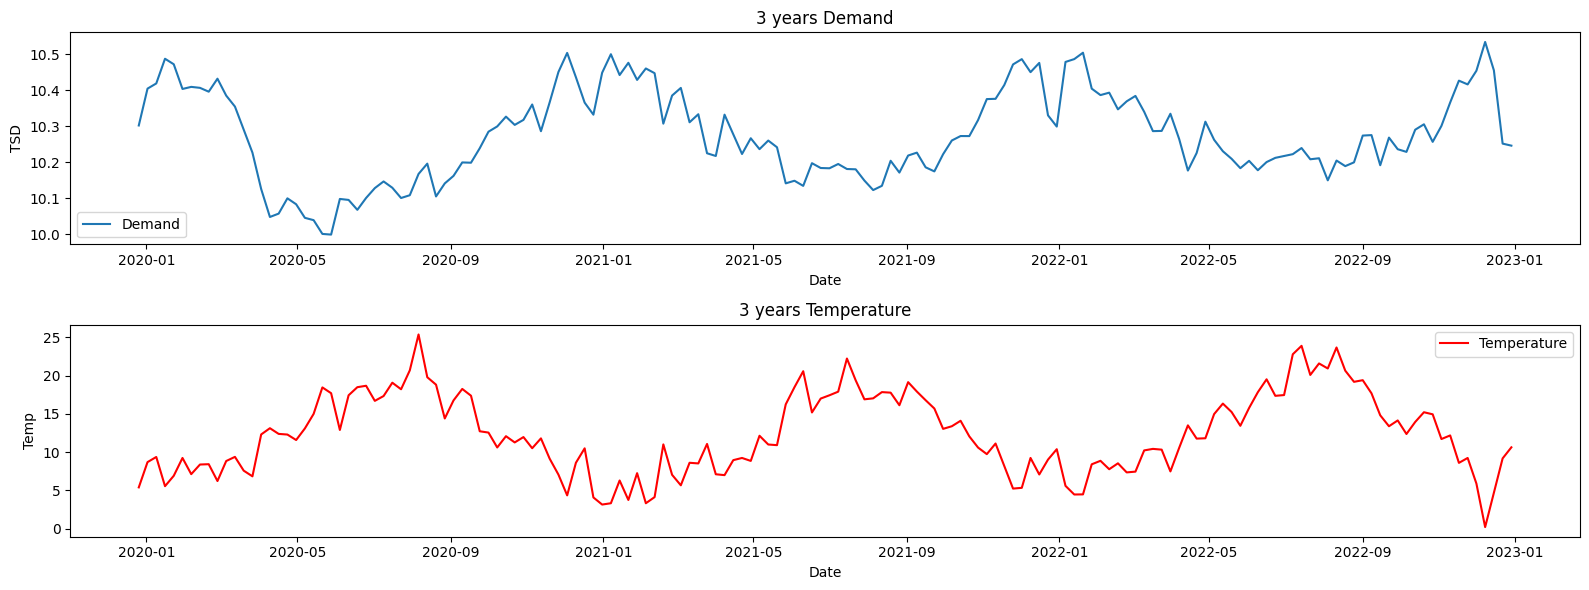

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(16, 6))  # 1 row, 2 columns


axs[0].plot(log_daily['settlement_date'], log_daily['tsd'], label='Demand')
axs[0].set_title('3 years Demand')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('TSD')
axs[0].legend()


axs[1].plot(weekly_we['datetime'], weekly_we['temp'], label='Temperature', color="red")
axs[1].set_title('3 years Temperature')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Temp')
axs[1].legend()

plt.tight_layout()
plt.show()

In [55]:
df2020_hol = df_raw[["settlement_date","tsd","is_holiday"]]
df2020_hol = df2020_hol[(df2020_hol["settlement_date"] >= "2019-12-20")&(df2020_hol["settlement_date"] <= "2020-01-03")]
df2020_hol['settlement_date'] = pd.to_datetime(df2020_hol['settlement_date'])
df2020_hol['settlement_date'] = df2020_hol['settlement_date'].dt.floor('D')
df2020_hol = df2020_hol.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()
df2020_hol["tsd"] = np.log(df2020_hol["tsd"])


df2021_hol = df_raw[["settlement_date","tsd","is_holiday"]]
df2021_hol = df2021_hol[(df2021_hol["settlement_date"] >= "2020-12-20")&(df2021_hol["settlement_date"] <= "2021-01-03")]
df2021_hol['settlement_date'] = pd.to_datetime(df2021_hol['settlement_date'])
df2021_hol['settlement_date'] = df2021_hol['settlement_date'].dt.floor('D')
df2021_hol = df2021_hol.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()
df2021_hol["tsd"] = np.log(df2021_hol["tsd"])


df2022_hol = df_raw[["settlement_date","tsd","is_holiday"]]
df2022_hol = df2022_hol[(df2022_hol["settlement_date"] >= "2021-12-20")&(df2022_hol["settlement_date"] <= "2022-01-03")]
df2022_hol['settlement_date'] = pd.to_datetime(df2022_hol['settlement_date'])
df2022_hol['settlement_date'] = df2022_hol['settlement_date'].dt.floor('D')
df2022_hol = df2022_hol.groupby('settlement_date').agg({"tsd":"mean",'is_holiday': 'mean'}).reset_index()
df2022_hol["tsd"] = np.log(df2022_hol["tsd"])





In [56]:
df2020_hol

,settlement_date,tsd,is_holiday
0,2019-12-20,10.486178,0.0
1,2019-12-21,10.394918,0.0
2,2019-12-22,10.341448,0.0
3,2019-12-23,10.383951,0.0
4,2019-12-24,10.345149,0.0
5,2019-12-25,10.264959,1.0
6,2019-12-26,10.266762,1.0
7,2019-12-27,10.350215,0.0
8,2019-12-28,10.300053,0.0
9,2019-12-29,10.261700,0.0


In [57]:
df2021_hol

,settlement_date,tsd,is_holiday
0,2020-12-20,10.278093,0.0
1,2020-12-21,10.423664,0.0
2,2020-12-22,10.441474,0.0
3,2020-12-23,10.372294,0.0
4,2020-12-24,10.330498,0.0
5,2020-12-25,10.305191,1.0
6,2020-12-26,10.184040,0.0
7,2020-12-27,10.252609,0.0
8,2020-12-28,10.376456,1.0
9,2020-12-29,10.409274,0.0


In [58]:
df2022_hol.loc[df2022_hol['settlement_date'] == '2022-01-01', 'is_holiday'] = 1
df2022_hol

,settlement_date,tsd,is_holiday
0,2021-12-20,10.506779,0.0
1,2021-12-21,10.523173,0.0
2,2021-12-22,10.541820,0.0
3,2021-12-23,10.468160,0.0
4,2021-12-24,10.371090,0.0
5,2021-12-25,10.248675,1.0
6,2021-12-26,10.279477,0.0
7,2021-12-27,10.321651,0.0
8,2021-12-28,10.311974,1.0
9,2021-12-29,10.294207,0.0


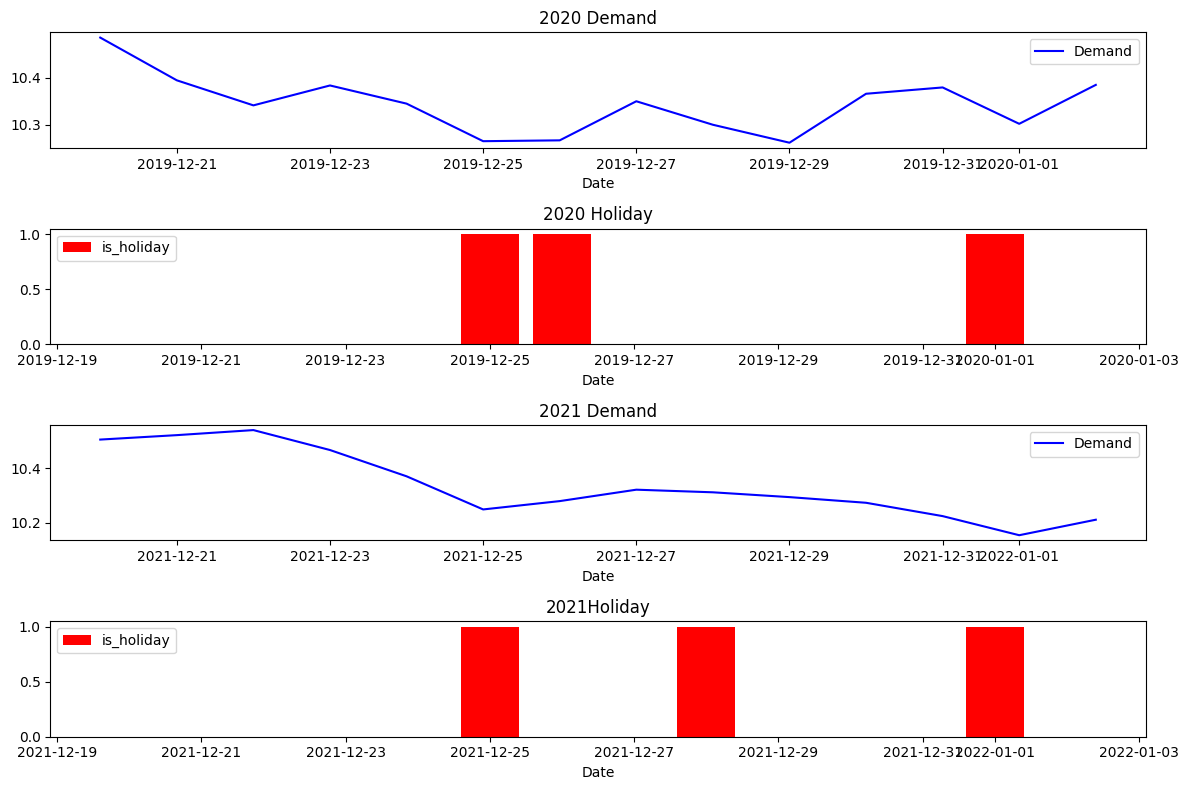

In [66]:
fig, axs = plt.subplots(4, 1, figsize=(12, 8))

axs[0].plot(df2020_hol['settlement_date'], df2020_hol['tsd'], label='Demand',color="blue")
axs[0].set_title('2020 Demand')
axs[0].set_xlabel('Date')
axs[0].legend()

axs[1].bar(df2020_hol['settlement_date'], df2020_hol['is_holiday'], label='is_holiday', color="red")
axs[1].set_title('2020 Holiday')
axs[1].set_xlabel('Date')
axs[1].legend()

axs[2].plot(df2022_hol['settlement_date'], df2022_hol['tsd'], label='Demand',color="blue")
axs[2].set_title('2021 Demand')
axs[2].set_xlabel('Date')
axs[2].legend()


axs[3].bar(df2022_hol['settlement_date'], df2022_hol['is_holiday'], label='is_holiday', color="red")
axs[3].set_title('2021Holiday')
axs[3].set_xlabel('Date')
axs[3].legend()



plt.tight_layout()
plt.show()